# Financial Data Analysis with Python - a Deep Dive

In [1]:
import pandas as pd
# import Yahoo finance API
import yfinance as yf

In [2]:
# set start and end date for time series
start = "2014-10-01"
end = "2021-05-31"

In [3]:
# set ticker symbol of financial instrument
# BA = The Boeing Company
# can be searcherd at https://finance.yahoo.com/
symbol = "BA"

In [4]:
# download historical price data for Boeing
# Boeing is a dividend paying stock therefore the adjusted close is lower than the close
# open, high, low and close prices don't take into account dividend payouts
# daily trading volume is in units (numbers of stocks that have been traded on a day)
df = yf.download(symbol, start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-30,128.570007,129.389999,127.309998,127.379997,110.763145,4000200
2014-10-01,127.370003,127.370003,124.309998,124.669998,108.406670,5265200
2014-10-02,124.400002,125.550003,123.839996,124.169998,107.971893,3204500
2014-10-03,124.660004,126.870003,124.660004,126.360001,109.876190,3075900
2014-10-06,127.089996,127.190002,125.379997,126.260002,109.789253,2681000
...,...,...,...,...,...,...
2021-05-24,235.139999,238.500000,232.600006,237.440002,237.440002,10106000
2021-05-25,240.000000,243.779999,239.229996,240.740005,240.740005,12908000
2021-05-26,241.699997,242.490005,239.869995,241.369995,241.369995,7240200


In [5]:
# get some meta information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1678 entries, 2014-09-30 to 2021-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1678 non-null   float64
 1   High       1678 non-null   float64
 2   Low        1678 non-null   float64
 3   Close      1678 non-null   float64
 4   Adj Close  1678 non-null   float64
 5   Volume     1678 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 91.8 KB


In [6]:
# drawing data for different ticker symbols at once
symbol = ["BA", "MSFT", "^DJI", "EURUSD=X", "GC=F", "BTC-USD"]

Ticker Symbols:
- **BA:** Boeing (US Stock)
- **MSFT:** Microsoft Corp (US Stock)
- **^DJI:** Dow Jones Industrial Average (US Stock Index)
- **EURUSD=X:** Exchange Rate for Currency Pair EUR/USD (Forex)
- **GC=F:** Gold Price (Precious Metal / Commodity)
- **BTC-USD:** Bitcoin in USD (Cryptocurrency)

In [7]:
df = yf.download(symbol, start, end)
df

[*********************100%***********************]  6 of 6 completed


Adj Close                                                   \
                    BA       BTC-USD  EURUSD=X         GC=F        MSFT   
Date                                                                      
2014-09-30  110.763161    386.944000  1.269084  1210.500000   40.407616   
2014-10-01  108.406670    383.614990  1.262834  1214.599976   40.006680   
2014-10-02  107.971893    375.071991  1.262419  1214.199951   39.884651   
2014-10-03  109.876205    359.511993  1.267058  1192.199951   40.172268   
2014-10-04         NaN    328.865997       NaN          NaN         NaN   
...                ...           ...       ...          ...         ...   
2021-05-26  241.369995  39294.199219  1.224909  1901.300049  249.453094   
2021-05-27  250.699997  38436.968750  1.219260  1895.699951  247.290726   
2021-05-28  247.020004  35697.605469  1.219319  1902.500000  247.657730   
2021-05-29         NaN  34616.066406       NaN          NaN         NaN   
2021-05-30         NaN  35678.128906       NaN          NaN         NaN   

                               Close                                       \
                    ^DJI          BA       BTC-USD  EURUSD=X         GC=F   
Date                                                                        
2014-09-30  17042.900391  127.379997    386.944000  1.269084  1210.500000   
2014-10-01  16804.710938  124.669998    383.614990  1.262834  1214.599976   
2014-10-02  16801.050781  124.169998    375.071991  1.262419  1214.199951   
2014-10-03  17009.689453  126.360001    359.511993  1.267058  1192.199951   
2014-10-04           NaN         NaN    328.865997       NaN          NaN   
...                  ...         ...           ...       ...          ...   
2021-05-26  34323.050781  241.369995  39294.199219  1.224909  1901.300049   
2021-05-27  34464.640625  250.699997  38436.968750  1.219260  1895.699951   
2021-05-28  34529.449219  247.020004  35697.605469  1.219319  1902.500000   
2021-05-29           NaN         NaN  34616.066406       NaN          NaN   
2021-05-30           NaN         NaN  35678.128906       NaN          NaN   

            ...      Open                                             Volume  \
            ...  EURUSD=X         GC=F        MSFT          ^DJI          BA   
Date        ...                                                                
2014-09-30  ...  1.269100  1214.800049   46.369999  17070.449219   4000200.0   
2014-10-01  ...  1.262913  1207.699951   46.270000  17040.460938   5265200.0   
2014-10-02  ...  1.262499  1215.300049   45.830002  16808.269531   3204500.0   
2014-10-03  ...  1.266994  1212.400024   45.980000  16802.199219   3075900.0   
2014-10-04  ...       NaN          NaN         NaN           NaN         NaN   
...         ...       ...          ...         ...           ...         ...   
2021-05-26  ...  1.224890  1901.300049  251.429993  34336.339844   7240200.0   
2021-05-27  ...  1.219036  1896.800049  251.169998  34432.468750  18404400.0   
2021-05-28  ...  1.219274  1897.500000  251.000000  34558.500000  11197400.0   
2021-05-29  ...       NaN          NaN         NaN           NaN         NaN   
2021-05-30  ...       NaN          NaN         NaN           NaN         NaN   

                                                                     
                BTC-USD EURUSD=X      GC=F        MSFT         ^DJI  
Date                                                                 
2014-09-30     34707300      0.0     680.0  33033100.0  102290000.0  
2014-10-01     26229400      0.0     178.0  38088400.0  104240000.0  
2014-10-02     21777700      0.0     176.0  25119400.0   75490000.0  
2014-10-03     30901200      0.0     499.0  32453200.0   87940000.0  
2014-10-04     47236500      NaN       NaN         NaN          NaN  
...                 ...      ...       ...         ...          ...  
2021-05-26  51346735160      0.0  170526.0  17771600.0  258780000.0  
2021-05-27  43210968721      0.0   35794.0  24426200.0  520630

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2435 entries, 2014-09-30 to 2021-05-30
Freq: D
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BA)        1678 non-null   float64
 1   (Adj Close, BTC-USD)   2435 non-null   float64
 2   (Adj Close, EURUSD=X)  1736 non-null   float64
 3   (Adj Close, GC=F)      1675 non-null   float64
 4   (Adj Close, MSFT)      1678 non-null   float64
 5   (Adj Close, ^DJI)      1678 non-null   float64
 6   (Close, BA)            1678 non-null   float64
 7   (Close, BTC-USD)       2435 non-null   float64
 8   (Close, EURUSD=X)      1736 non-null   float64
 9   (Close, GC=F)          1675 non-null   float64
 10  (Close, MSFT)          1678 non-null   float64
 11  (Close, ^DJI)          1678 non-null   float64
 12  (High, BA)             1678 non-null   float64
 13  (High, BTC-USD)        2435 non-null   float64
 14  (High, EURUSD=X)       1736 no

In [9]:
# saving the panda's data frame locally in a file
df.to_csv("../../Assets/Data-Files/multi_assets.csv")

## Initial Inspection and Visualization

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

Some more (advanced) techniques to load data into Pandas: https://blog.udemy.com/how-to-create-pandas-dataframes-a-hands-on-guide/

In [11]:
# load the data back into python and pandas
# header = [0, 1] sets the first two rows to column headers
# index_col = 0 moves date to the index
# parse_dates transform date string to datetime index
df = pd.read_csv("../../Assets/Data-Files/multi_assets.csv", header = [0, 1], index_col = 0, parse_dates = [0])
df

Adj Close                                                    \
                  BA    BTC-USD EURUSD=X      GC=F     MSFT       ^DJI   
Date                                                                     
2014-09-30  110.7632   386.9440   1.2691 1210.5000  40.4076 17042.9004   
2014-10-01  108.4067   383.6150   1.2628 1214.6000  40.0067 16804.7109   
2014-10-02  107.9719   375.0720   1.2624 1214.2000  39.8847 16801.0508   
2014-10-03  109.8762   359.5120   1.2671 1192.2000  40.1723 17009.6895   
2014-10-04       NaN   328.8660      NaN       NaN      NaN        NaN   
...              ...        ...      ...       ...      ...        ...   
2021-05-26  241.3700 39294.1992   1.2249 1901.3000 249.4531 34323.0508   
2021-05-27  250.7000 38436.9688   1.2193 1895.7000 247.2907 34464.6406   
2021-05-28  247.0200 35697.6055   1.2193 1902.5000 247.6577 34529.4492   
2021-05-29       NaN 34616.0664      NaN       NaN      NaN        NaN   
2021-05-30       NaN 35678.1289      NaN       NaN      NaN        NaN   

              Close                                ...     Open            \
                 BA    BTC-USD EURUSD=X      GC=F  ... EURUSD=X      GC=F   
Date                                               ...                      
2014-09-30 127.3800   386.9440   1.2691 1210.5000  ...   1.2691 1214.8000   
2014-10-01 124.6700   383.6150   1.2628 1214.6000  ...   1.2629 1207.7000   
2014-10-02 124.1700   375.0720   1.2624 1214.2000  ...   1.2625 1215.3000   
2014-10-03 126.3600   359.5120   1.2671 1192.2000  ...   1.2670 1212.4000   
2014-10-04      NaN   328.8660      NaN       NaN  ...      NaN       NaN   
...             ...        ...      ...       ...  ...      ...       ...   
2021-05-26 241.3700 39294.1992   1.2249 1901.3000  ...   1.2249 1901.3000   
2021-05-27 250.7000 38436.9688   1.2193 1895.7000  ...   1.2190 1896.8000   
2021-05-28 247.0200 35697.6055   1.2193 1902.5000  ...   1.2193 1897.5000   
2021-05-29      NaN 34616.0664      NaN       NaN  ...      NaN       NaN   
2021-05-30      NaN 35678.1289      NaN       NaN  ...      NaN       NaN   

                                      Volume                        \
               MSFT       ^DJI            BA      BTC-USD EURUSD=X   
Date                                                                 
2014-09-30  46.3700 17070.4492  4000200.0000     34707300   0.0000   
2014-10-01  46.2700 17040.4609  5265200.0000     26229400   0.0000   
2014-10-02  45.8300 16808.2695  3204500.0000     21777700   0.0000   
2014-10-03  45.9800 16802.1992  3075900.0000     30901200   0.0000   
2014-10-04      NaN        NaN           NaN     47236500      NaN   
...             ...        ...           ...          ...      ...   
2021-05-26 251.4300 34336.3398  7240200.0000  51346735160   0.0000   
2021-05-27 251.1700 34432.4688 18404400.0000  43210968721   0.0000   
2021-05-28 251.0000 34558.5000 11197400.0000  55200191952   0.0000   
2021-05-29      NaN        NaN           NaN  45231013335      NaN   
2021-05-30      NaN        NaN           NaN  31646080921      NaN   

                                                     
                  GC=F          MSFT           ^DJI  
Date                                                 
2014-09-30    680.0000 33033100.0000 102290000.0000  
2014-10-01    178.0000 38088400.0000 104240000.0000  
2014-10-02    176.0000 25119400.0000  75490000.0000  
2014-10-03    499.0000 32453200.0000  87940000.0000  
2014-10-04         NaN           NaN            NaN  
...                ...           ...            ...  
2021-05-26 170526.0000 17771600.0000 258780000.0000  
2021-05-27  35794.0000 24426200.0000 520630000.0000  
2021-05-28   2415.0000 18270200.0000 290850000.0000  
2021-05-29         NaN           NaN            NaN  
2021-05-30         NaN           NaN            NaN  

[2435 rows x 36 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2435 entries, 2014-09-30 to 2021-05-30
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BA)        1678 non-null   float64
 1   (Adj Close, BTC-USD)   2435 non-null   float64
 2   (Adj Close, EURUSD=X)  1736 non-null   float64
 3   (Adj Close, GC=F)      1675 non-null   float64
 4   (Adj Close, MSFT)      1678 non-null   float64
 5   (Adj Close, ^DJI)      1678 non-null   float64
 6   (Close, BA)            1678 non-null   float64
 7   (Close, BTC-USD)       2435 non-null   float64
 8   (Close, EURUSD=X)      1736 non-null   float64
 9   (Close, GC=F)          1675 non-null   float64
 10  (Close, MSFT)          1678 non-null   float64
 11  (Close, ^DJI)          1678 non-null   float64
 12  (High, BA)             1678 non-null   float64
 13  (High, BTC-USD)        2435 non-null   float64
 14  (High, EURUSD=X)       1736 non-null  

In [13]:
# select data element in the outer index level
df.Close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-09-30,127.3800,386.9440,1.2691,1210.5000,46.3600,17042.9004
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [14]:
# further slice data frame and select single column
df.Close.BA # returns onedimensional labeled array

Date
2014-09-30   127.3800
2014-10-01   124.6700
2014-10-02   124.1700
2014-10-03   126.3600
2014-10-04        NaN
               ...   
2021-05-26   241.3700
2021-05-27   250.7000
2021-05-28   247.0200
2021-05-29        NaN
2021-05-30        NaN
Name: BA, Length: 2435, dtype: float64

In [15]:
# second option how to select one column
# DataFrame.loc accesses a group of rows and columns by label(s) or a boolean array
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
df.loc[:, ("Close", "BA")]

Date
2014-09-30   127.3800
2014-10-01   124.6700
2014-10-02   124.1700
2014-10-03   126.3600
2014-10-04        NaN
               ...   
2021-05-26   241.3700
2021-05-27   250.7000
2021-05-28   247.0200
2021-05-29        NaN
2021-05-30        NaN
Name: (Close, BA), Length: 2435, dtype: float64

In [16]:
# select single row for all columns
df.loc["2015-01-07"]

Adj Close  BA              113.2724
           BTC-USD         294.3370
           EURUSD=X          1.1875
           GC=F           1210.6000
           MSFT             40.5484
           ^DJI          17584.5195
Close      BA              129.5100
           BTC-USD         294.3370
           EURUSD=X          1.1875
           GC=F           1210.6000
           MSFT             46.2300
           ^DJI          17584.5195
High       BA              129.9700
           BTC-USD         298.7540
           EURUSD=X          1.1900
           GC=F           1219.2000
           MSFT             46.4600
           ^DJI          17597.0801
Low        BA              128.7200
           BTC-USD         283.0790
           EURUSD=X          1.1804
           GC=F           1210.6000
           MSFT             45.4900
           ^DJI          17374.7793
Open       BA              128.7400
           BTC-USD         286.0770
           EURUSD=X          1.1875
           GC=F           12

In [17]:
# select single year
df.loc["2015"]

Adj Close                                                   Close  \
                  BA  BTC-USD EURUSD=X      GC=F    MSFT       ^DJI       BA   
Date                                                                           
2015-01-01       NaN 314.2490   1.2099       NaN     NaN        NaN      NaN   
2015-01-02  113.6572 315.0320   1.2089 1186.0000 41.0133 17832.9902 129.9500   
2015-01-03       NaN 281.0820      NaN       NaN     NaN        NaN      NaN   
2015-01-04       NaN 264.1950      NaN       NaN     NaN        NaN      NaN   
2015-01-05  112.8700 274.4740   1.1946 1203.9000 40.6362 17501.6504 129.0500   
...              ...      ...      ...       ...     ...        ...      ...   
2015-12-27       NaN 422.8230      NaN       NaN     NaN        NaN      NaN   
2015-12-28  129.6283 422.2790   1.0966 1070.5000 50.4099 17528.2695 144.5400   
2015-12-29  132.1484 432.9830   1.0975 1077.5000 50.9504 17720.9805 147.3500   
2015-12-30  131.3054 426.6200   1.0928 1060.1000 50.7342 17603.8691 146.4100   
2015-12-31  129.6731 430.5670   1.0934 1060.3000 49.9864 17425.0293 144.5900   

                                        ...     Open                    \
            BTC-USD EURUSD=X      GC=F  ... EURUSD=X      GC=F    MSFT   
Date                                    ...                              
2015-01-01 314.2490   1.2099       NaN  ...   1.2099       NaN     NaN   
2015-01-02 315.0320   1.2089 1186.0000  ...   1.2089 1184.0000 46.6600   
2015-01-03 281.0820      NaN       NaN  ...      NaN       NaN     NaN   
2015-01-04 264.1950      NaN       NaN  ...      NaN       NaN     NaN   
2015-01-05 274.4740   1.1946 1203.9000  ...   1.1955 1180.3000 46.3700   
...             ...      ...       ...  ...      ...       ...     ...   
2015-12-27 422.8230      NaN       NaN  ...      NaN       NaN     NaN   
2015-12-28 422.2790   1.0966 1070.5000  ...   1.0966 1077.9000 55.3500   
2015-12-29 432.9830   1.0975 1077.5000  ...   1.0977 1079.1000 56.2900   
2015-12-30 426.6200   1.0928 1060.1000  ...   1.0928 1068.6000 56.4700   
2015-12-31 430.5670   1.0934 1060.3000  ...   1.0938 1061.9000 56.0400   

                            Volume                                            \
                 ^DJI           BA   BTC-USD EURUSD=X     GC=F          MSFT   
Date                                                                           
2015-01-01        NaN          NaN   8036550   0.0000      NaN           NaN   
2015-01-02 17823.0703 4294200.0000   7860650   0.0000 138.0000 27913900.0000   
2015-01-03        NaN          NaN  33054400      NaN      NaN           NaN   
2015-01-04        NaN          NaN  55629100      NaN      NaN           NaN   
2015-01-05 17821.3008 5024800.0000  43962800   0.0000 470.0000 39673900.0000   
...               ...          ...       ...      ...      ...           ...   
2015-12-27        NaN          NaN  53591200      NaN      NaN           NaN   
2015-12-28 17535.6602 1980000.0000  49638600   0.0000 361.0000 22458300.0000   
2015-12-29 17547.3691 3133600.0000  51596500   0.0000 252.0000 27731400.0000   
2015-12-30 17711.9395 1619000.0000  46889400   0.0000  71.0000 21704500.0000   
2015-12-31 17590.6602 2105200.0000  45996600   0.0000  10.0000 27334100.0000   

                           
                     ^DJI  
Date                       
2015-01-01            NaN  
2015-01-02  76270000.0000  
2015-01-03            NaN  
2015-01-04            NaN  
2015-01-05 116160000.0000  
...                   ...  
2015-12-27            NaN  
2015-12-28  59770000.0000  
2015-12-29  69860000.0000  
2015-12-30  59760000.0000  
2015-12-31  93690000.0000  

[365 rows x 36 columns]

In [18]:
# swap the levels
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

BA                                                    \
           Adj Close    Close     High      Low     Open        Volume   
Date                                                                     
2014-09-30  110.7632 127.3800 129.3900 127.3100 128.5700  4000200.0000   
2014-10-01  108.4067 124.6700 127.3700 124.3100 127.3700  5265200.0000   
2014-10-02  107.9719 124.1700 125.5500 123.8400 124.4000  3204500.0000   
2014-10-03  109.8762 126.3600 126.8700 124.6600 124.6600  3075900.0000   
2014-10-04       NaN      NaN      NaN      NaN      NaN           NaN   
...              ...      ...      ...      ...      ...           ...   
2021-05-26  241.3700 241.3700 242.4900 239.8700 241.7000  7240200.0000   
2021-05-27  250.7000 250.7000 252.6000 247.1900 248.1100 18404400.0000   
2021-05-28  247.0200 247.0200 248.9800 245.3700 247.4800 11197400.0000   
2021-05-29       NaN      NaN      NaN      NaN      NaN           NaN   
2021-05-30       NaN      NaN      NaN      NaN      NaN           NaN   

              BTC-USD                                   ...     MSFT           \
            Adj Close      Close       High        Low  ...     High      Low   
Date                                                    ...                     
2014-09-30   386.9440   386.9440   390.9770   373.4430  ...  46.4800  46.0100   
2014-10-01   383.6150   383.6150   391.3790   380.7800  ...  46.5300  45.8500   
2014-10-02   375.0720   375.0720   385.4970   372.9460  ...  46.1000  45.6400   
2014-10-03   359.5120   359.5120   377.6950   357.8590  ...  46.3000  45.6100   
2014-10-04   328.8660   328.8660   364.4870   325.8860  ...      NaN      NaN   
...               ...        ...        ...        ...  ...      ...      ...   
2021-05-26 39294.1992 39294.1992 40782.0781 37905.8359  ... 252.9400 250.7500   
2021-05-27 38436.9688 38436.9688 40379.6172 37247.9023  ... 251.4800 249.2500   
2021-05-28 35697.6055 35697.6055 38856.9688 34779.0391  ... 252.0800 249.5600   
2021-05-29 34616.0664 34616.0664 37234.5000 33693.9297  ...      NaN      NaN   
2021-05-30 35678.1289 35678.1289 36400.6680 33520.7383  ...      NaN      NaN   

                                        ^DJI                                   \
               Open        Volume  Adj Close      Close       High        Low   
Date                                                                            
2014-09-30  46.3700 33033100.0000 17042.9004 17042.9004 17145.0996 17017.1094   
2014-10-01  46.2700 38088400.0000 16804.7109 16804.7109 17041.1602 16776.1309   
2014-10-02  45.8300 25119400.0000 16801.0508 16801.0508 16857.2500 16674.0391   
2014-10-03  45.9800 32453200.0000 17009.6895 17009.6895 17027.8398 16802.1992   
2014-10-04      NaN           NaN        NaN        NaN        NaN        NaN   
...             ...           ...        ...        ...        ...        ...   
2021-05-26 251.4300 17771600.0000 34323.0508 34323.0508 34409.5898 34271.4414   
2021-05-27 251.1700 24426200.0000 34464.6406 34464.6406 34608.8203 34389.2383   
2021-05-28 251.0000 18270200.0000 34529.4492 34529.4492 34631.1094 34520.0898   
2021-05-29      NaN           NaN        NaN        NaN        NaN        NaN   
2021-05-30      NaN           NaN        NaN        NaN        NaN        NaN   

                                      
                 Open         Volume  
Date                                  
2014-09-30 17070.4492 102290000.0000  
2014-10-01 17040.4609 104240000.0000  
2014-10-02 16808.2695  75490000.0000  
2014-10-03 16802.1992  87940000.0000  
2014-10-04        NaN            NaN  
...               ...            ...  
2021-05-26 34336.3398 258780000.0000  
2021-05-27 34432.4688 520630000.0000  
2021-05-28 34558.5000 290850000.0000  
2021-05-29        NaN            NaN  
2021-05-30        NaN            NaN  

[2435 rows x 36 columns]

In [19]:
# after the swap some columns have special characters
# so they can't be retrieved with dot noation anymore
df["EURUSD=X"]

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-30,1.2691,1.2691,1.2702,1.2574,1.2691,0.0000
2014-10-01,1.2628,1.2628,1.2640,1.2586,1.2629,0.0000
2014-10-02,1.2624,1.2624,1.2691,1.2616,1.2625,0.0000
2014-10-03,1.2671,1.2671,1.2670,1.2502,1.2670,0.0000
2014-10-04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,1.2249,1.2249,1.2265,1.2200,1.2249,0.0000
2021-05-27,1.2193,1.2193,1.2217,1.2176,1.2190,0.0000
2021-05-28,1.2193,1.2193,1.2201,1.2133,1.2193,0.0000


In [20]:
df["BTC-USD"]

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-30,386.9440,386.9440,390.9770,373.4430,376.0880,34707300
2014-10-01,383.6150,383.6150,391.3790,380.7800,387.4270,26229400
2014-10-02,375.0720,375.0720,385.4970,372.9460,383.9880,21777700
2014-10-03,359.5120,359.5120,377.6950,357.8590,375.1810,30901200
2014-10-04,328.8660,328.8660,364.4870,325.8860,359.8920,47236500
...,...,...,...,...,...,...
2021-05-26,39294.1992,39294.1992,40782.0781,37905.8359,38392.6250,51346735160
2021-05-27,38436.9688,38436.9688,40379.6172,37247.9023,39316.8906,43210968721
2021-05-28,35697.6055,35697.6055,38856.9688,34779.0391,38507.0820,55200191952


In [21]:
# swap the levels back
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

Adj Close                                                    \
                  BA    BTC-USD EURUSD=X      GC=F     MSFT       ^DJI   
Date                                                                     
2014-09-30  110.7632   386.9440   1.2691 1210.5000  40.4076 17042.9004   
2014-10-01  108.4067   383.6150   1.2628 1214.6000  40.0067 16804.7109   
2014-10-02  107.9719   375.0720   1.2624 1214.2000  39.8847 16801.0508   
2014-10-03  109.8762   359.5120   1.2671 1192.2000  40.1723 17009.6895   
2014-10-04       NaN   328.8660      NaN       NaN      NaN        NaN   
...              ...        ...      ...       ...      ...        ...   
2021-05-26  241.3700 39294.1992   1.2249 1901.3000 249.4531 34323.0508   
2021-05-27  250.7000 38436.9688   1.2193 1895.7000 247.2907 34464.6406   
2021-05-28  247.0200 35697.6055   1.2193 1902.5000 247.6577 34529.4492   
2021-05-29       NaN 34616.0664      NaN       NaN      NaN        NaN   
2021-05-30       NaN 35678.1289      NaN       NaN      NaN        NaN   

              Close                                ...     Open            \
                 BA    BTC-USD EURUSD=X      GC=F  ... EURUSD=X      GC=F   
Date                                               ...                      
2014-09-30 127.3800   386.9440   1.2691 1210.5000  ...   1.2691 1214.8000   
2014-10-01 124.6700   383.6150   1.2628 1214.6000  ...   1.2629 1207.7000   
2014-10-02 124.1700   375.0720   1.2624 1214.2000  ...   1.2625 1215.3000   
2014-10-03 126.3600   359.5120   1.2671 1192.2000  ...   1.2670 1212.4000   
2014-10-04      NaN   328.8660      NaN       NaN  ...      NaN       NaN   
...             ...        ...      ...       ...  ...      ...       ...   
2021-05-26 241.3700 39294.1992   1.2249 1901.3000  ...   1.2249 1901.3000   
2021-05-27 250.7000 38436.9688   1.2193 1895.7000  ...   1.2190 1896.8000   
2021-05-28 247.0200 35697.6055   1.2193 1902.5000  ...   1.2193 1897.5000   
2021-05-29      NaN 34616.0664      NaN       NaN  ...      NaN       NaN   
2021-05-30      NaN 35678.1289      NaN       NaN  ...      NaN       NaN   

                                      Volume                        \
               MSFT       ^DJI            BA      BTC-USD EURUSD=X   
Date                                                                 
2014-09-30  46.3700 17070.4492  4000200.0000     34707300   0.0000   
2014-10-01  46.2700 17040.4609  5265200.0000     26229400   0.0000   
2014-10-02  45.8300 16808.2695  3204500.0000     21777700   0.0000   
2014-10-03  45.9800 16802.1992  3075900.0000     30901200   0.0000   
2014-10-04      NaN        NaN           NaN     47236500      NaN   
...             ...        ...           ...          ...      ...   
2021-05-26 251.4300 34336.3398  7240200.0000  51346735160   0.0000   
2021-05-27 251.1700 34432.4688 18404400.0000  43210968721   0.0000   
2021-05-28 251.0000 34558.5000 11197400.0000  55200191952   0.0000   
2021-05-29      NaN        NaN           NaN  45231013335      NaN   
2021-05-30      NaN        NaN           NaN  31646080921      NaN   

                                                     
                  GC=F          MSFT           ^DJI  
Date                                                 
2014-09-30    680.0000 33033100.0000 102290000.0000  
2014-10-01    178.0000 38088400.0000 104240000.0000  
2014-10-02    176.0000 25119400.0000  75490000.0000  
2014-10-03    499.0000 32453200.0000  87940000.0000  
2014-10-04         NaN           NaN            NaN  
...                ...           ...            ...  
2021-05-26 170526.0000 17771600.0000 258780000.0000  
2021-05-27  35794.0000 24426200.0000 520630000.0000  
2021-05-28   2415.0000 18270200.0000 290850000.0000  
2021-05-29         NaN           NaN            NaN  
2021-05-30         NaN           NaN            NaN  

[2435 rows x 36 columns]

In [22]:
# for further analysis we're only intersted in the close price
# select daily close prices only and create a separate data frame
close = df.Close.copy()
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-09-30,127.3800,386.9440,1.2691,1210.5000,46.3600,17042.9004
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [24]:
# get summary statistics
close.describe()

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,1678.0000,2435.0000,1736.0000,1675.0000,1678.0000,1678.0000
mean,228.6776,7610.8635,1.1407,1371.9181,106.2786,23000.8200
std,94.3785,11609.7207,0.0502,235.6780,60.7718,4660.8050
min,95.0100,178.1030,1.0390,1050.8000,40.2900,15660.1797
25%,143.3175,532.6250,1.1055,1216.4000,54.8075,18085.6870
50%,189.0150,4365.9399,1.1300,1283.1000,89.6600,23609.1602
75%,335.0775,9205.4233,1.1777,1482.2000,138.9000,26289.3452
max,440.6200,63503.4570,1.2822,2051.5000,261.9700,34777.7617


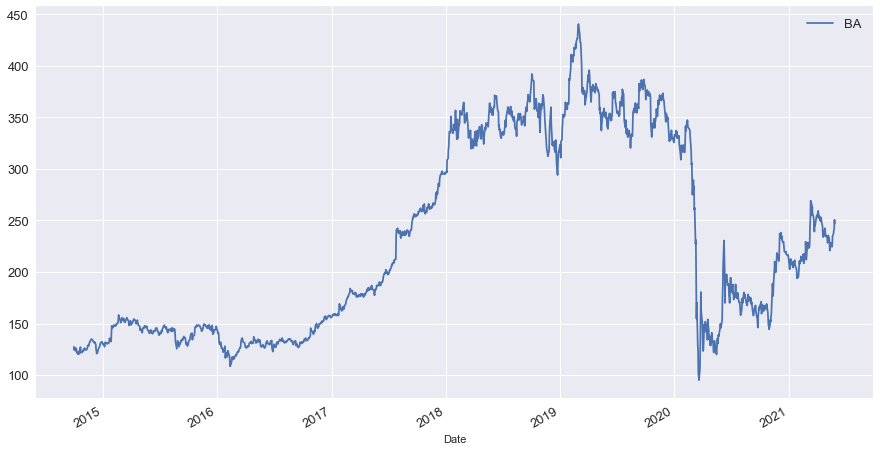

In [26]:
# create price chart for singule instrument
# dropna() drops missing values
# create chart with plot method
close.BA.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

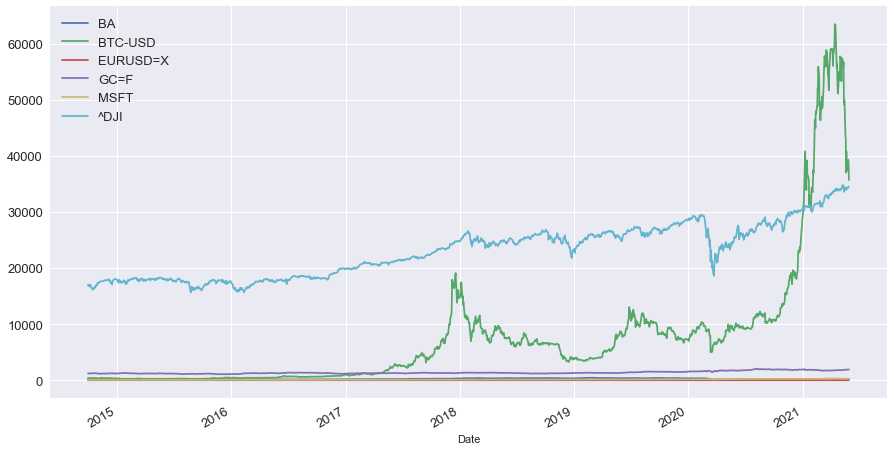

In [27]:
# create price chart for all six instruments in one single chart
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

**Take Home: Absolute Prices are absolutely meaningless/useless (in most cases)**

- Prices that are in a different scale are hard to compare
- A higher price does not imply a higher value or a better performance

## Normalizing Financial Time Series to Base Value (100)

Normalizing to **Base Value** means that all instruments start at the very same level.

In [32]:
# the data frame to work with
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-09-30,127.3800,386.9440,1.2691,1210.5000,46.3600,17042.9004
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [29]:
# normalizing for one instrument (Boeing)
close.iloc[0,0] # first price of BA

127.37999725341795

In [40]:
# divide all prices of BA by the very first price
# which creates a base value of 1
# then multiply with 100 to get base value of 100
close.BA.div(close.iloc[0,0]).mul(100)

Date
2014-09-30   100.0000
2014-10-01    97.8725
2014-10-02    97.4800
2014-10-03    99.1992
2014-10-04        NaN
               ...   
2021-05-26   189.4881
2021-05-27   196.8127
2021-05-28   193.9237
2021-05-29        NaN
2021-05-30        NaN
Name: BA, Length: 2435, dtype: float64

In [36]:
close.iloc[0] # first price all tickers

BA           127.3800
BTC-USD      386.9440
EURUSD=X       1.2691
GC=F        1210.5000
MSFT          46.3600
^DJI       17042.9004
Name: 2014-09-30 00:00:00, dtype: float64

In [41]:
norm = close.div(close.iloc[0]).mul(100)
norm

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-09-30,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
2014-10-01,97.8725,99.1397,99.5075,100.3387,99.0078,98.6024
2014-10-02,97.4800,96.9319,99.4748,100.3057,98.7058,98.5809
2014-10-03,99.1992,92.9106,99.8404,98.4882,99.4176,99.8051
2014-10-04,NaN,84.9906,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,189.4881,10155.0093,96.5192,157.0673,542.4720,201.3921
2021-05-27,196.8127,9933.4707,96.0740,156.6047,537.7696,202.2229
2021-05-28,193.9237,9225.5224,96.0787,157.1665,538.5677,202.6031


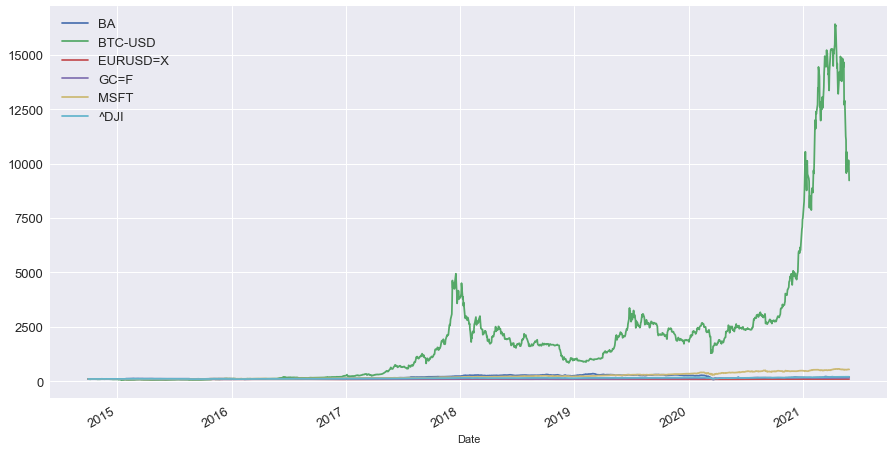

In [43]:
# visualizing the normalized data
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = False)
plt.legend(fontsize = 13)
plt.show()

The normalized data is still difficult to compare because Bitcoin shows a much better performance than the other five instruments. To make the data better comparable the scale of the y-axis can be changed to create a logarithimc scale.

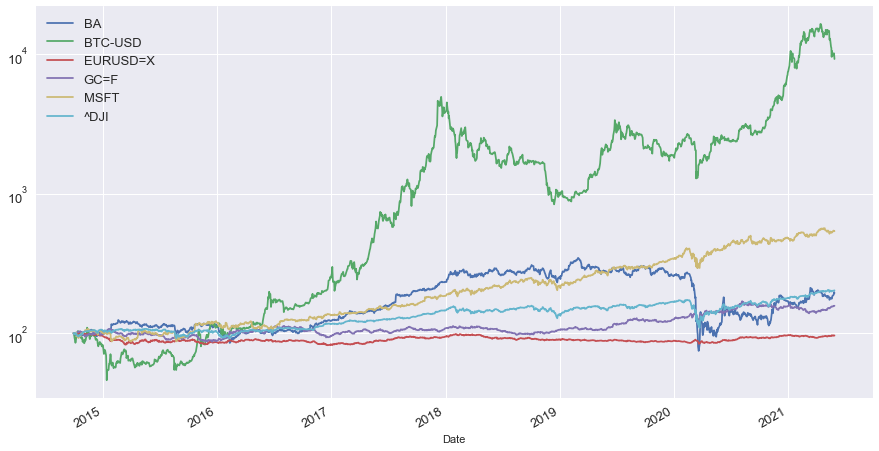

In [45]:
# changing the scale of the y-axis to logarithmic scale with logy = True
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = True)
plt.legend(fontsize = 13)
plt.show()

**Take Home: Normalized prices help to compare financial instruments....**

**....but they are limited when it comes to measuring/comparing performance in more detail**

In [46]:
close.to_csv(("../../Assets/Data-Files/close.csv"))